In [1]:
import sys

In [2]:
BASE_DIR = "../.."
DATA_DIR = f"{BASE_DIR}/data"
NBDATA_DIR = f"{BASE_DIR}/nbdata"
FIG_DIR = f"{BASE_DIR}/figs"

In [3]:
sys.path.append(BASE_DIR)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [5]:
import anndata as ad
import scanpy as sc

## Import DEG Analysis

In [18]:
deg_raw = pd.read_csv(f"{NBDATA_DIR}/iPSC_deseq2_condition.tsv",sep="\t")

In [19]:
name_map = pd.read_csv(f"{NBDATA_DIR}/iPSC_ENSG_HGNC_mapping.tsv",sep="\t").set_index('ENSG')

In [52]:
deg_df = pd.merge(deg_raw,name_map,left_index=True,right_index=True,how='left')\
    .reset_index()\
    .set_index('HGNC')

In [53]:
deg_df['-log10(p adj)'] = -np.log10(deg_df['padj'])

In [57]:
deg_df = deg_df.rename(
    {
        'index':'ESNG',
        'log2FoldChange':'log2(fold change)'
    }
    ,axis=1)

In [54]:
deg_df

,ESNG,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10(p adj)
HGNC,,,,,,,,
BBS9,ENSG00000122507,482.254543,-1.103188,0.097553,-11.308592,1.189831e-29,2.910923e-25,24.535969
PVALB,ENSG00000100362,38.410147,-1.535439,0.140639,-10.917598,9.497458e-28,1.161777e-23,22.934877
NPIPB15,ENSG00000196436,64.974823,3.891810,0.371523,10.475299,1.121823e-25,9.148468e-22,21.038652
CHP2,ENSG00000166869,114.375049,-1.301314,0.133557,-9.743530,1.966033e-22,1.202475e-18,17.919924
UBE2L6,ENSG00000156587,978.319889,-0.549121,0.056706,-9.683577,3.541067e-22,1.732644e-18,17.761291
...,...,...,...,...,...,...,...,...
RERE-AS1,ENSG00000232912,1.278969,-0.000033,0.679851,-0.000049,9.999612e-01,NaN,NaN
ENSG00000260973,ENSG00000260973,1.404485,0.000000,3.666292,0.000000,1.000000e+00,NaN,NaN
RHOT1P2,ENSG00000203616,0.570581,0.000000,3.666292,0.000000,1.000000e+00,NaN,NaN


## Visualize Top Genes by Pvalue

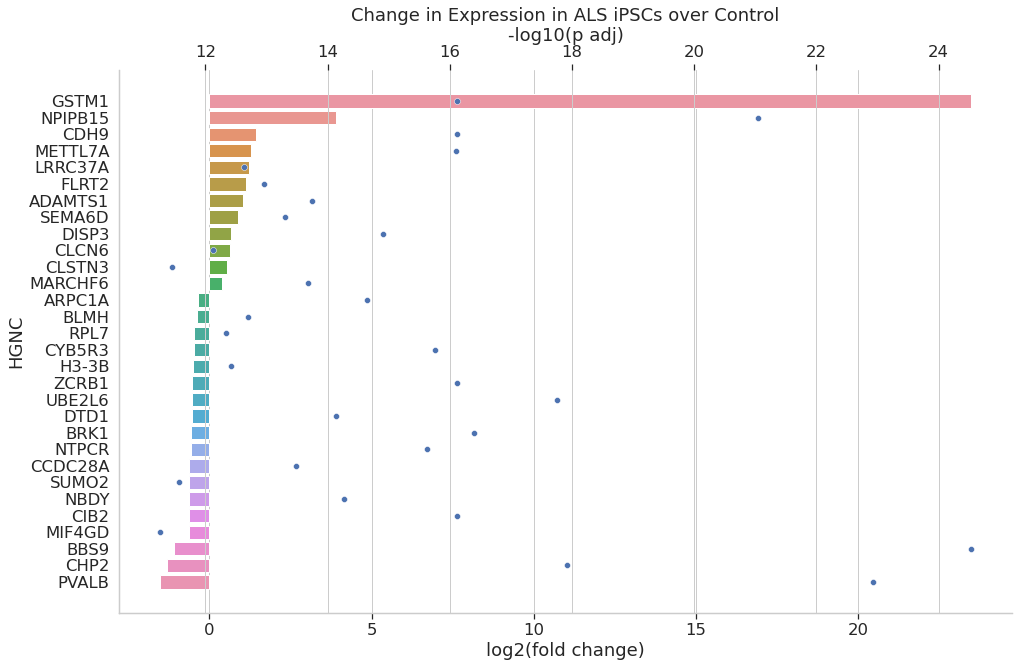

In [60]:
sns.set(style='whitegrid',font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(16,10))
sns.barplot(data=deg_df.reset_index()\
                .sort_values(by='padj',ascending=True)\
                .head(30)\
                .sort_values(by='log2(fold change)',ascending=False),
            y='HGNC',x='log2(fold change)',ax=ax1)
ax2 = ax1.twiny()
ax2.invert_yaxis()
sns.scatterplot(data=deg_df.reset_index()\
                .sort_values(by='padj',ascending=True)\
                .head(30)\
                .sort_values(by='log2(fold change)',ascending=False),
            y='HGNC',x='-log10(p adj)',ax=ax2)
sns.despine()
plt.ylabel('Gene Name')
# plt.xlabel('Log2 Fold Change (ALS/CTR)')
plt.title('Change in Expression in ALS iPSCs over Control')
plt.savefig(f"{FIG_DIR}/ipsc_als_v_ctr_deseq_topgenes.png",bbox_inches='tight')